Перший рівень

In [1]:
import pandas as pd
import numpy as np

df_pandas = pd.read_csv("household_power_consumption.txt", delimiter=';', low_memory=False)

types = [("Date", "U10"), ("Time", "U8"), ("Global_active_power",  "float64"), ("Global_reactive_power", "float64"), 
        ("Voltage",  "float64"), ("Global_intensity", "float64"), ("Sub_metering_1",  "float64"), ("Sub_metering_2", "float64"), 
        ("Sub_metering_3",  "float64")] 

df_numpy = np.genfromtxt("household_power_consumption.txt", 
                                missing_values=["?",np.nan], 
                                delimiter=';', 
                                dtype=types, 
                                encoding="UTF=8", 
                                names=True)

df_pandas['Date'] = pd.to_datetime(df_pandas['Date'], format='%d/%m/%Y')
df_pandas['Time'] = pd.to_datetime(df_pandas['Time'], format='%H:%M:%S')
cols_to_convert = df_pandas.columns.difference(['Date', 'Time'])
df_pandas[cols_to_convert] = df_pandas[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df_pandas.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [2]:
from timeit import timeit

t1_pandas = timeit("df_pandas[df_pandas['Global_active_power'] > 5]", globals=globals(), number=10)
t1_numpy = timeit("df_numpy[df_numpy['Global_active_power'] > 5]", globals=globals(), number=10)

In [3]:
t2_pandas = timeit("df_pandas[df_pandas['Voltage'] > 235]", globals=globals(), number=10)
t2_numpy = timeit("df_numpy[df_numpy['Voltage'] > 235]", globals=globals(), number=10)

In [4]:
t3_pandas = timeit("df_pandas[(df_pandas['Global_intensity'] >= 19) & "
                    "(df_pandas['Global_intensity'] <= 20) & "
                    "(df_pandas['Sub_metering_2'] > df_pandas['Sub_metering_3'])]", 
                    globals=globals(), 
                    number=10)  

t3_numpy = timeit("df_numpy[(df_numpy['Global_intensity'] >= 19) & "
                    "(df_numpy['Global_intensity'] <= 20) & "
                    "(df_numpy['Sub_metering_2'] > df_numpy['Sub_metering_3'])]", 
                    globals=globals(), 
                    number=10)  

In [5]:
t4_pandas = timeit(
"""
samples = df_pandas.sample(n=500000, random_state=42)
samples[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
""",
    globals=globals(),
    number=10
)


t4_numpy = timeit(
"""
index = np.random.choice(len(df_numpy), size=500000, replace=False)
samples = df_numpy[index]
np.mean(samples['Sub_metering_1'])
np.mean(samples['Sub_metering_2'])
np.mean(samples['Sub_metering_3'])
""",
    globals=globals(),
    number=10
)


In [6]:
t5_pandas = timeit(
"""
df_after_18 = df_pandas[(df_pandas['Time'].dt.time >= pd.to_datetime("18:00:00").time()) & (df_pandas['Global_active_power'] > 6)]
group_2 = df_after_18[(df_after_18['Sub_metering_2'] > df_after_18['Sub_metering_1']) & (df_after_18['Sub_metering_2'] > df_after_18['Sub_metering_3'])]
mid = len(group_2) // 2
first_group = group_2.iloc[:mid]
second_group = group_2.iloc[mid:]
first_group = first_group.iloc[::3]
second_group = second_group.iloc[::4]
""",
    globals=globals(),
    number=10
)

t5_numpy = timeit(
"""
df_after_18 = df_numpy[(np.char.greater_equal(df_numpy['Time'], '18:00:00')) & (df_numpy['Global_active_power'] > 6)]
group_2 = df_after_18[(df_after_18['Sub_metering_2'] > df_after_18['Sub_metering_1']) & (df_after_18['Sub_metering_2'] > df_after_18['Sub_metering_3'])]
mid = len(group_2) // 2
first_group = group_2[:mid]
second_group = group_2[mid:]
first_group = first_group[::3]
second_group = second_group[::4]
""",
    globals=globals(),
    number=10
)

In [7]:
times = pd.DataFrame([['Pandas', 'Numpy'],
                      [t1_pandas, t1_numpy], 
                      [t2_pandas, t2_numpy],
                      [t3_pandas, t3_numpy],
                      [t4_pandas, t4_numpy],
                      [t5_pandas, t5_numpy]])

times.index = ['№','Завдання 1', 'Завдання 2', 'Завдання 3', 'Завдання 4', 'Завдання 5']
times.head(6)

,0,1
№,Pandas,Numpy
Завдання 1,0.033143,0.126629
Завдання 2,0.873679,1.063198
Завдання 3,0.082023,0.377709
Завдання 4,1.176325,1.257924
Завдання 5,6.395474,0.42394


Другий рівень

In [8]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
                "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
df_numpy = df.to_records(index=False)
df.head(50)

C:\Users\vovan\AppData\Local\Temp\ipykernel_23108\4104195038.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [9]:
import numpy as np

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

index = np.isnan(df_numpy['horsepower'])
df_numpy['horsepower'][index] = np.nanmean(df_numpy['horsepower'])

In [10]:
def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

def standardize(arr):
    return (arr - np.mean(arr)) / np.std(arr)

df['weight_norm'] = normalize(df['weight'])
df_numpy_weight_norm = normalize(df_numpy['weight'])

df['accel_std'] = standardize(df['acceleration'])
df_numpy_accel_std = standardize(df_numpy['acceleration'])

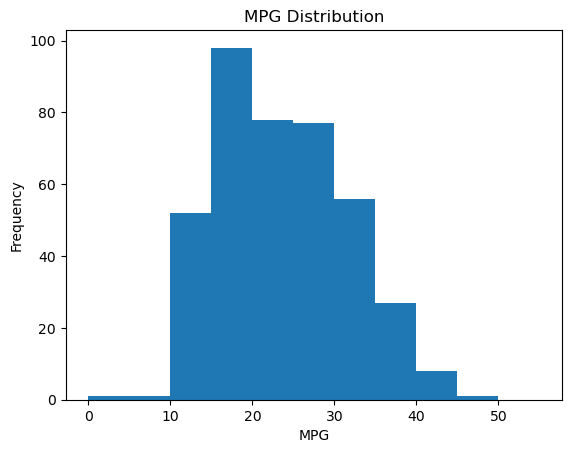

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['mpg'], bins=[0,10,15,20,25,30,35,40,45,50,55])
plt.title("MPG Distribution")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

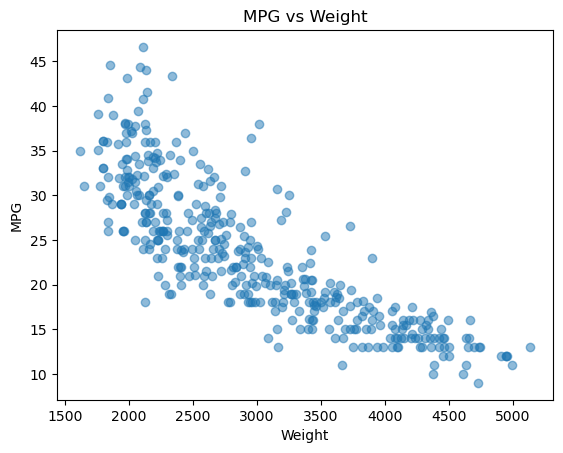

In [12]:
plt.scatter(df['weight'], df['mpg'], alpha=0.5)
plt.title("MPG vs Weight")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

In [13]:
from scipy.stats import pearsonr, spearmanr

pearson_coef, _ = pearsonr(df['weight'], df['mpg'])
spearman_coef, _ = spearmanr(df['weight'], df['mpg'])
print(f"Pearson: {pearson_coef:.3f}, Spearman: {spearman_coef:.3f}")

Pearson: -0.832, Spearman: -0.875


In [14]:
df_encoded = pd.get_dummies(df, columns=['origin'], prefix='origin')

Linear Середньоквадратична помилка: 16.110


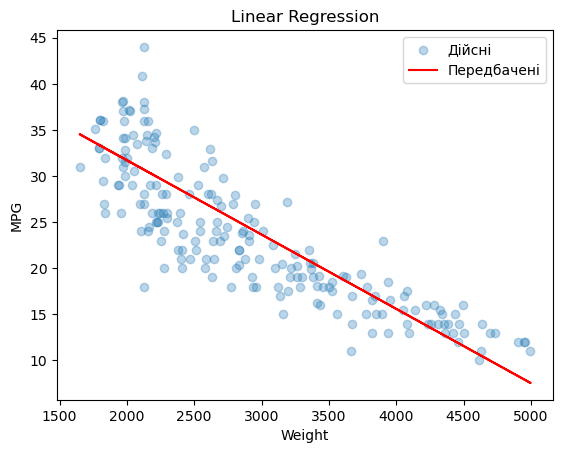

Ridge Середньоквадратична помилка: 16.110


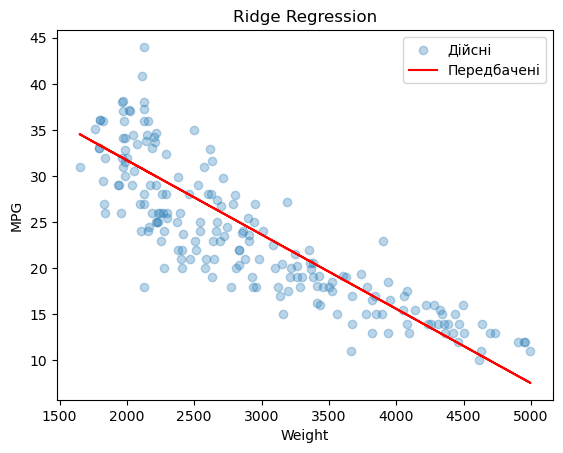

Lasso Середньоквадратична помилка: 16.108


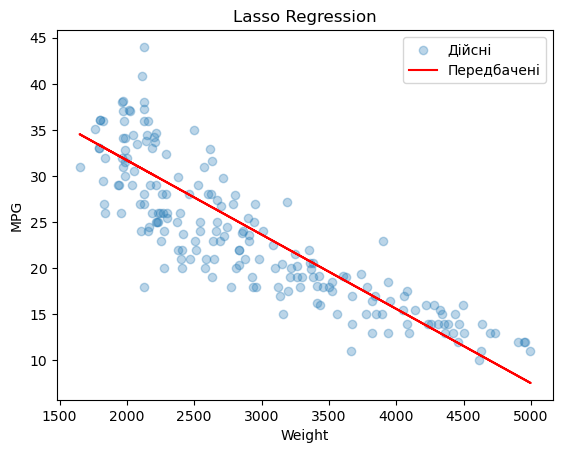

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

X = df[['weight']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Середньоквадратична помилка: {mse:.3f}")

    plt.scatter(X_test, y_test, alpha=0.3, label='Дійсні')
    plt.plot(X_test, y_pred, color='red', label='Передбачені')
    plt.title(f"{name} Regression")
    plt.xlabel("Weight")
    plt.ylabel("MPG")
    plt.legend()
    plt.show()